# 🧠 CNN Basics (Convolutional Neural Network)

**Convolutional Neural Networks (CNNs)** are deep learning models designed to process data with a **grid-like structure** such as images.  
They form the foundation of most modern **computer vision** applications because they can automatically detect important features in visual data.  


## ⚙️ How CNNs Work?

1. 🖼️ **Input Image**  
   - CNN receives an input image which is preprocessed to ensure **uniform size and format**.  

2. 🔍 **Convolutional Layers**  
   - Apply **filters (kernels)** to the image to extract features like **edges, textures, and shapes**.  

3. 📉 **Pooling Layers**  
   - **Downsample** the feature maps to reduce **dimensionality** while keeping important information.  

4. 🔗 **Fully Connected Layers**  
   - Flatten and pass the features through fully connected layers to make decisions (e.g., classification).  

5. 🎯 **Output**  
   - The CNN outputs a prediction, such as the **class of the image**.
     
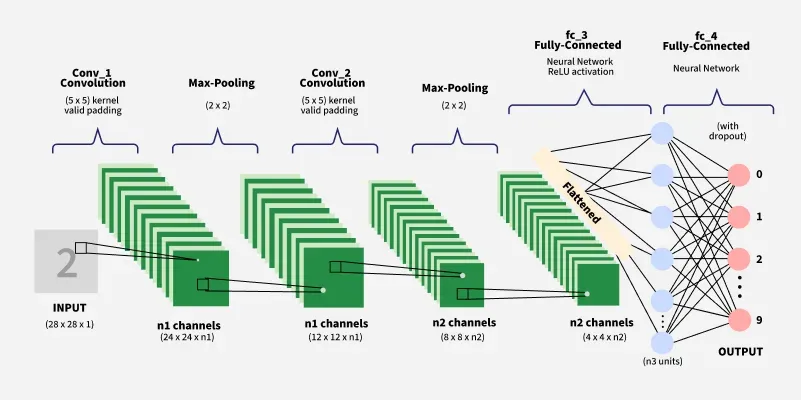

# 🧠 Why CNNs for Images (Local Patterns, Spatial Hierarchies)

##  Local Patterns

### 📌 What?
- Local patterns are **small features** in an image such as **edges, corners, and textures**.  
- CNNs use **convolutional filters** that scan over small regions (e.g., 3×3 or 5×5 pixels) to detect these patterns.

### 🤔 Why?
- Local features are **building blocks** of images.  
- Detecting them helps the network understand the image structure.  
- Convolutions allow **translation invariance** → the same feature can be detected **anywhere** in the image.  

### 🌍 Where?
- **Edge detection** in early CNN layers.  
- **Texture recognition** (e.g., skin, fur, fabric).  
- **Handwriting or character recognition** (where strokes and corners matter).  

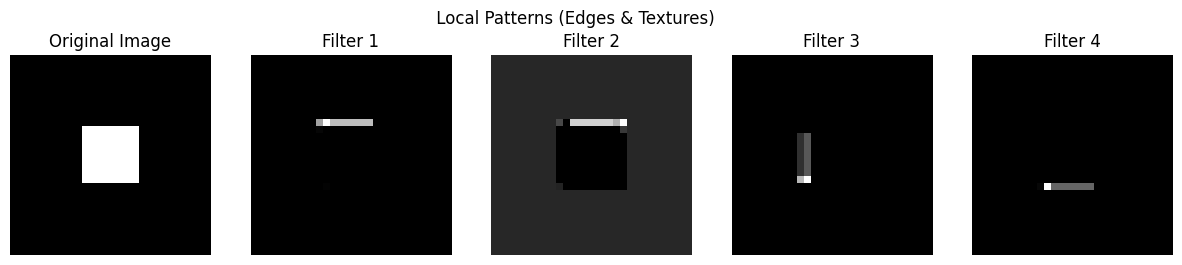

In [3]:
# 🖼️ Local Patterns without torchvision (synthetic image)

import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

#  Creating a synthetic image (28x28 with a white square in center)
image = np.zeros((28, 28))
image[10:18, 10:18] = 1.0  # white square
image = torch.tensor(image, dtype=torch.float32).unsqueeze(0).unsqueeze(0)  # [1,1,28,28]

#  Conv layer for local patterns
conv = nn.Conv2d(1, 4, kernel_size=3, stride=1, padding=1)

with torch.no_grad():
    local_features = F.relu(conv(image))

#  Show original + feature maps
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
axes[0].imshow(image[0,0].numpy(), cmap="gray")
axes[0].set_title("Original Image")
axes[0].axis("off")

for i in range(4):
    axes[i+1].imshow(local_features[0, i].numpy(), cmap="gray")
    axes[i+1].set_title(f"Filter {i+1}")
    axes[i+1].axis("off")

plt.suptitle(" Local Patterns (Edges & Textures)")
plt.show()

##  Spatial Hierarchies

### 📌 What?
- Spatial hierarchies are **layers of abstraction** built step by step in CNNs:  
  - Lower layers → simple features (edges, lines).  
  - Middle layers → shapes and patterns (circles, eyes, leaves).  
  - Higher layers → complex objects (faces, animals, vehicles).  

### 🤔 Why?
- Images are **composed hierarchically**: small features combine to form bigger patterns.  
- CNNs mimic how humans recognize visuals: from **low-level details** → to **high-level understanding**.  
- Enables CNNs to generalize well to complex real-world images.  

### 🌍 Where?
- **Object detection** (cars, pedestrians in self-driving).  
- **Face recognition** (combining eyes, nose, mouth into a full face).  
- **Medical imaging** (cells → tissues → organs → disease classification).  



✅ **Conclusion:**  
CNNs are powerful because they can:  
- Capture **local patterns** (small details).  
- Build **spatial hierarchies** (from details to full objects).  
This combination makes them ideal for **image understanding** tasks.

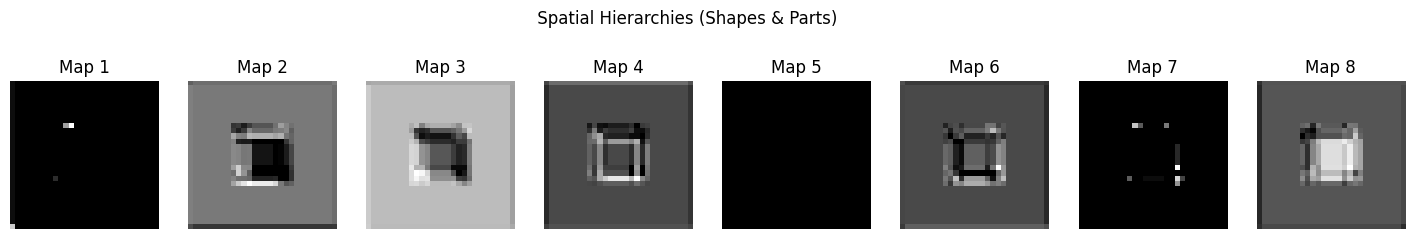

In [4]:
# 🏗️ Spatial Hierarchies without torchvision (synthetic image)

import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

#  Synthetic image 
image = np.zeros((28, 28))
image[10:18, 10:18] = 1.0
image = torch.tensor(image, dtype=torch.float32).unsqueeze(0).unsqueeze(0)  # [1,1,28,28]

#  Two conv layers
conv1 = nn.Conv2d(1, 4, kernel_size=3, stride=1, padding=1)
conv2 = nn.Conv2d(4, 8, kernel_size=3, stride=1, padding=1)

with torch.no_grad():
    x1 = F.relu(conv1(image))  # local features
    x2 = F.relu(conv2(x1))     # spatial hierarchies

#  Show feature maps from second layer
fig, axes = plt.subplots(1, 8, figsize=(18, 3))
for i in range(8):
    axes[i].imshow(x2[0, i].numpy(), cmap="gray")
    axes[i].set_title(f"Map {i+1}")
    axes[i].axis("off")

plt.suptitle(" Spatial Hierarchies (Shapes & Parts)")
plt.show()

# 🔹Key Operations

# Convolution (filters/kernals)

## ⚙️ What is a Kernel / Filter?

- A **kernel**, also called a filter, is a small matrix used to **extract features** from input images.  
- These features can be edges, textures, or patterns.  
- The values in the kernel aren’t fixed manually they’re **learned** during training by backpropagation + gradient descent.  


## 🧩 Structure of Kernels

- **Size**: Typically small, like **3×3**, **5×5**, **7×7** etc. The size controls how much of the input the kernel “sees” at once.  
- **Depth**: If the input has multiple channels (e.g. RGB has 3 channels), the kernel will have corresponding depth.  


## 🔄 How Kernels Operate in a CNN

1. **Sliding / Moving**  
   The kernel “slides” over the input image, applying operations in patches. Stride (step size) controls how far it moves each time. Padding may be used to handle edges.  

2. **Element-wise Multiplication + Summation**  
   For each position, do element-wise product between kernel and the corresponding patch of the image, then sum to get a single value. That becomes one pixel in the **feature map**.  

3. **Feature Map / Activation Map**  
   The output after applying a kernel across all valid positions is called a **feature map**. It shows where certain features (edges, textures) are detected.  

4. **Learning of Kernel Values**  
   During training, the kernel weights are adjusted so that the filters become good at extracting useful features for the task.  

5. **Stacking Multiple Kernels per Layer**  
   In each convolutional layer, multiple kernels are used in parallel. Each learns to detect different types of features. Their outputs (feature maps) are stacked in depth.  


## ✅ Why Kernels Matter

- They allow a CNN to **automatically detect useful features** instead of relying on manually engineered features.  
- By using many kernels (of various types), the network can build a **rich representation** of the input.  
- Kernels are a core reason CNNs can form **spatial hierarchies** of features  from edges → textures → shapes → objects.  


## 📝 Summary

- Kernels are *learnable filters* in CNNs that extract features.  
- Types include edge detection, sharpening, smoothing, embossing, custom, and frequency-based.  
- The mechanics: sliding, multiplication & sum, stacking, and learning.  
- Kernels are fundamental in enabling CNNs to understand images at multiple levels (local to global structure).
 
## Kernal Operate In CNNs
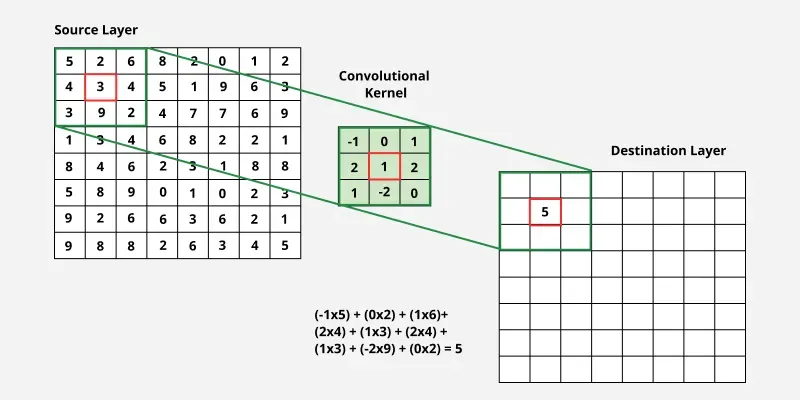

In [5]:
import tensorflow as tf
import numpy as np

np.random.seed(0)

input_image = np.random.random([1, 5, 5, 1])

conv_layer = tf.keras.layers.Conv2D(filters=1, kernel_size=(3, 3), strides=(1, 1), padding='valid')

output = conv_layer(input_image)

print("Shape of output:", output.shape)
print("Output of the convolution:", output.numpy())

Shape of output: (1, 3, 3, 1)
Output of the convolution: [[[[ 0.20956479]
   [ 0.0598435 ]
   [-0.3185563 ]]

  [[-0.06496655]
   [ 0.56491697]
   [ 0.15186621]]

  [[ 0.40694368]
   [ 0.33931562]
   [-0.19277968]]]]


# 🟩 Strides in CNNs


## ❓ What is Stride?
- **Stride** refers to the step size with which a kernel moves across the image during convolution.  
- By default, stride = 1 (move one pixel at a time).  

## 🤔 Why Strides?
1. **Control Spatial Resolution**  
   Larger strides → smaller feature maps → reduced computational cost.  

2. **Downsampling**  
   Acts like pooling, reducing dimensions while keeping important features.  

3. **Trade-off**  
   - Small stride → captures more detail, higher resolution.  
   - Large stride → faster, less detail, potential information loss.  


## 🌍 Where are Strides Used?
- To **shrink image/feature map size** without separate pooling layers.  
- In **object detection** or **classification CNNs** where progressively smaller feature maps are useful.  
- In modern architectures like **YOLO, MobileNet** that balance accuracy vs. efficiency.

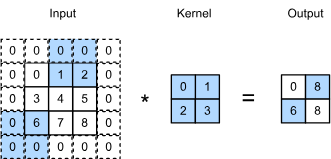

In [6]:
import torch
import torch.nn.functional as F

#  Create a 5x5 grayscale "image"
x = torch.arange(25, dtype=torch.float32).reshape(1, 1, 5, 5)
print("Input Image:\n", x)

#  Define a 3x3 kernel of ones
kernel = torch.ones((1, 1, 3, 3))

#  Convolution with Stride = 1
y1 = F.conv2d(x, kernel, stride=1, padding=1)
print("\nStride=1 → Output Shape:", y1.shape)
print(y1)

#  Convolution with Stride = 2
y2 = F.conv2d(x, kernel, stride=2, padding=1)
print("\nStride=2 → Output Shape:", y2.shape)
print(y2)

Input Image:
 tensor([[[[ 0.,  1.,  2.,  3.,  4.],
          [ 5.,  6.,  7.,  8.,  9.],
          [10., 11., 12., 13., 14.],
          [15., 16., 17., 18., 19.],
          [20., 21., 22., 23., 24.]]]])

Stride=1 → Output Shape: torch.Size([1, 1, 5, 5])
tensor([[[[ 12.,  21.,  27.,  33.,  24.],
          [ 33.,  54.,  63.,  72.,  51.],
          [ 63.,  99., 108., 117.,  81.],
          [ 93., 144., 153., 162., 111.],
          [ 72., 111., 117., 123.,  84.]]]])

Stride=2 → Output Shape: torch.Size([1, 1, 3, 3])
tensor([[[[ 12.,  27.,  24.],
          [ 63., 108.,  81.],
          [ 72., 117.,  84.]]]])


# 🟦 Padding in CNNs

## ❓ What is Padding?
- **Padding** is the process of adding extra rows/columns (usually zeros) around the border of an image before applying convolution.  
- It ensures that features near the borders are also properly considered.  


## 🤔 Why Padding?
1. **Preserve Dimensions**  
   Without padding, every convolution reduces the size of the image. Padding helps maintain the original spatial size.  
   
2. **Better Edge Feature Extraction**  
   Features near image borders would otherwise be underrepresented. Padding ensures kernels can detect them too.  

3. **Control Output Size**  
   - *Same Padding*: Keeps the output size equal to the input size.  
   - *Valid Padding*: No padding → output shrinks after convolution.  


## 🌍 Where is Padding Used?
- When we want to **maintain image size** across multiple layers.  
- In **deep CNNs** where shrinking feature maps too quickly would lose information.  
- In architectures like **ResNet, VGG, UNet** that require careful size alignment.
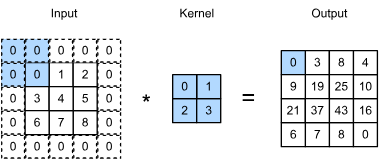

In [7]:
import torch
import torch.nn.functional as F

#  Create a 5x5 grayscale "image"
x = torch.arange(25, dtype=torch.float32).reshape(1, 1, 5, 5)
print("Input Image:\n", x)

#  Define a 3x3 kernel of ones
kernel = torch.ones((1, 1, 3, 3))

# Convolution with Stride = 1
y1 = F.conv2d(x, kernel, stride=1, padding=1)
print("\nStride=1 → Output Shape:", y1.shape)
print(y1)

#  Convolution with Stride = 2
y2 = F.conv2d(x, kernel, stride=2, padding=1)
print("\nStride=2 → Output Shape:", y2.shape)
print(y2)

Input Image:
 tensor([[[[ 0.,  1.,  2.,  3.,  4.],
          [ 5.,  6.,  7.,  8.,  9.],
          [10., 11., 12., 13., 14.],
          [15., 16., 17., 18., 19.],
          [20., 21., 22., 23., 24.]]]])

Stride=1 → Output Shape: torch.Size([1, 1, 5, 5])
tensor([[[[ 12.,  21.,  27.,  33.,  24.],
          [ 33.,  54.,  63.,  72.,  51.],
          [ 63.,  99., 108., 117.,  81.],
          [ 93., 144., 153., 162., 111.],
          [ 72., 111., 117., 123.,  84.]]]])

Stride=2 → Output Shape: torch.Size([1, 1, 3, 3])
tensor([[[[ 12.,  27.,  24.],
          [ 63., 108.,  81.],
          [ 72., 117.,  84.]]]])


# 🧠 Pooling Layers (CNNs)

## 🔹 What is Pooling?

Pooling is a downsampling operation applied to the output of convolutional layers in CNNs. It reduces the spatial dimensions (height and width) of feature maps while retaining important features. Pooling helps in reducing the number of parameters and computation in the network and makes feature detection more robust.


## 🔹 Why Use Pooling?

- **Dimensionality Reduction:** Reduces the size of feature maps, which decreases computation and memory usage.  
- **Feature Invariance:** Helps the network become more robust to small translations, rotations, or distortions in the input image.  
- **Prevents Overfitting:** By reducing the number of learnable parameters and simplifying the representation.  


## 🔹 Where is Pooling Used?

Pooling layers are usually applied **after convolutional layers** in a CNN. They downsample feature maps before feeding them into deeper convolutional layers or fully connected layers.
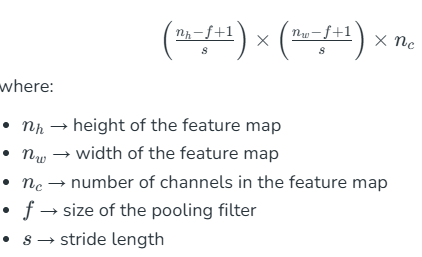

## 🔹 Types of Pooling

### 1️⃣ Max Pooling
- Selects the **maximum value** from a patch of the feature map.  
- Captures the **most prominent features**, like edges or textures.  
- Commonly used in CNNs for image classification, object detection, and recognition tasks.
    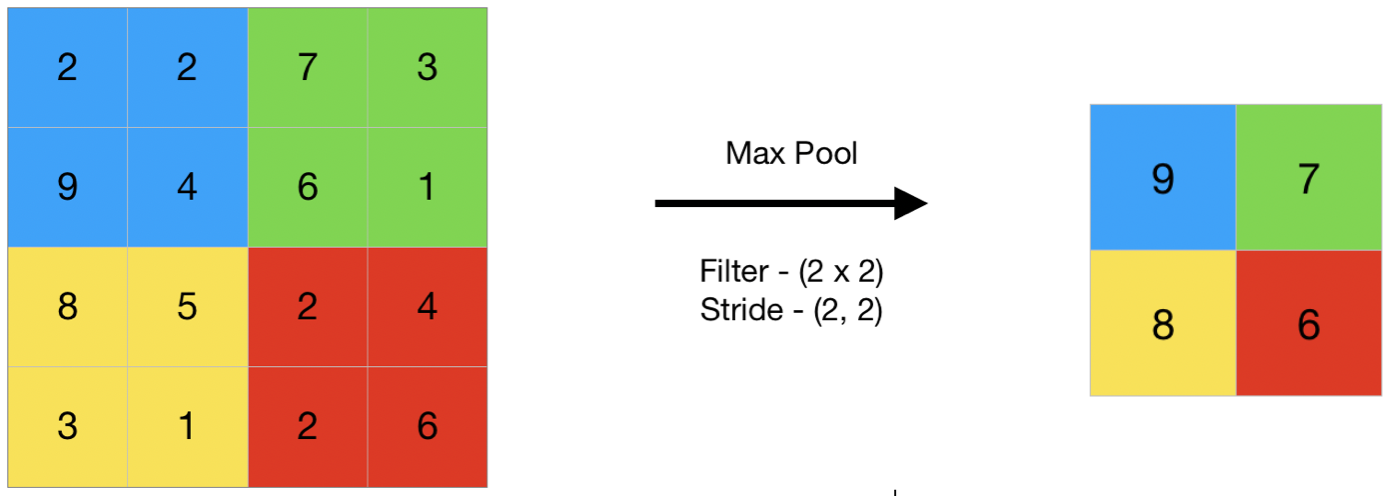

### 2️⃣ Average Pooling
- Computes the **average value** of a patch of the feature map.  
- Provides a **generalized representation** of features, useful when overall patterns matter more than individual extremes.  
- Less common than max pooling but sometimes used in tasks like segmentation or smoothing.
  
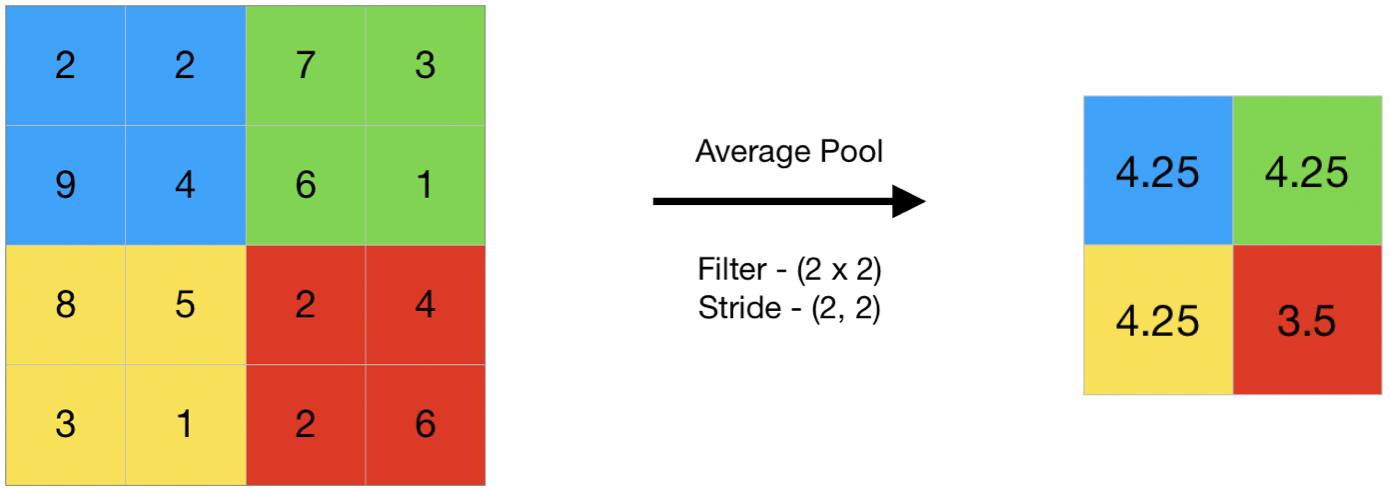

## 🔹 Summary Table

| Pooling Type   | Operation                          | Main Use Case                          |
|----------------|------------------------------------|----------------------------------------|
| Max Pooling    | Selects the maximum value          | Capturing sharp and dominant features |
| Average Pooling| Computes the average value         | Capturing smooth or general features  |


## 🔹 Key Points

- Pooling reduces **spatial dimensions** but keeps **depth unchanged**.  
- Improves **computational efficiency**

# ⚡ Activation Functions in Neural Networks

Activation functions introduce **non-linearity** into neural networks, allowing them to model complex patterns and relationships in data. Without activation functions, a neural network would behave like a linear model, regardless of the number of layers.  

## 1️⃣ ReLU (Rectified Linear Unit)

**What:**  
ReLU is defined as:
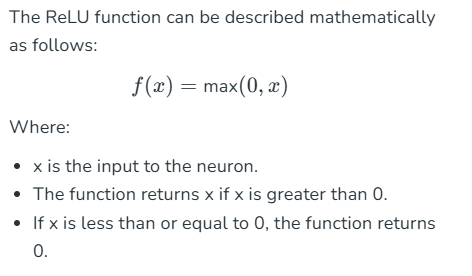
It outputs the input directly if it is positive; otherwise, it outputs zero.  

**Why:**  
- **Computationally efficient** (simple max operation).  
- Helps **avoid vanishing gradient problem** compared to sigmoid/tanh.  
- Introduces **non-linearity**, allowing the network to learn complex patterns.  

**Where:**  
- Most commonly used in **hidden layers of CNNs and MLPs**.  
- Works well for **image, text, and speech models**.  

**Limitations:**  
- Can cause **“dying ReLU” problem**, where neurons stop updating if the input is always negative.  


## 2️⃣ Leaky ReLU

**What:**  
Leaky ReLU addresses the “dying ReLU” problem. It allows a small, non-zero gradient for negative inputs:

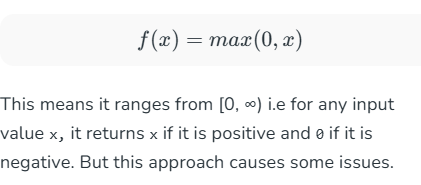


**Why:**  
- Prevents neurons from **dying** (zero gradient for negative inputs).  
- Allows **faster convergence** than sigmoid/tanh in deep networks.  

**Where:**  
- Used in **deep CNNs or MLPs** where some negative activations are important.  
- Useful when **ReLU causes too many inactive neurons**.  


## 3️⃣ GELU (Gaussian Error Linear Unit)

**What:**  
GELU combines properties of ReLU and sigmoid, using a smooth curve instead of a hard cutoff:

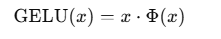

Where:
x = input
Φ(x) = cumulative distribution function (CDF) of the standard normal distribution

**Why:**  
- Smoothly **weights input values** instead of hard zeroing negative values.  
- Performs better in **transformer models** and very deep networks.  
- Helps with **gradient flow and training stability**.  

**Where:**  
- Widely used in **Transformer architectures** like BERT and GPT.  
- Preferred in **state-of-the-art NLP and vision models**.  


## 🔹 Summary Table

| Activation Function | Non-linearity Type | Pros                                    | Cons / Notes                       | Common Usage                        |
|--------------------|-----------------|----------------------------------------|-----------------------------------|------------------------------------|
| ReLU               | Piecewise linear | Simple, avoids vanishing gradient       | Dying ReLU problem                | CNNs, MLPs                        |
| Leaky ReLU         | Piecewise linear | Solves dying ReLU, small negative slope | Slightly more computation         | Deep CNNs, MLPs                    |
| GELU               | Smooth non-linear| Smooth, better gradient flow            | More computation than ReLU        | Transformers (BERT, GPT), deep networks |


## 🔹 Key Points

- Activation functions introduce **non-linearity** in neural networks.  
- Choice depends on **network depth, task, and architecture**.  
- **ReLU** is simple and widely used; **Leaky ReLU** solves dying ReLU; **GELU** is state-of-the-art for transformers.  

# 🏗️ Fully Connected (Dense) Layers in Neural Networks

## 🔹 What is a Fully Connected (Dense) Layer?

A **Fully Connected (Dense) Layer** is a layer where **every neuron is connected to every neuron in the previous layer**.  

Mathematically, the output of a dense layer is:

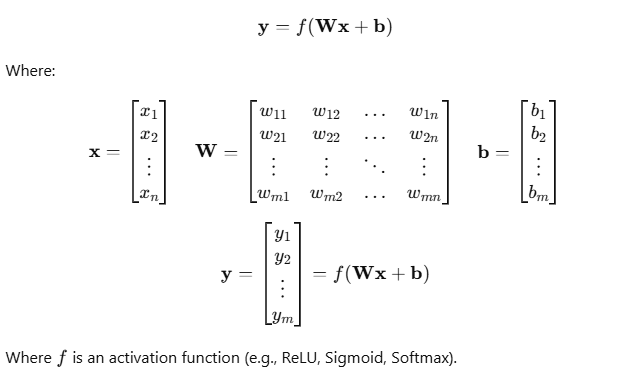

Dense layers are used to **learn global patterns** and combine features extracted from previous layers (like convolutional or recurrent layers).


## 🔹 Why Use Fully Connected Layers?

- **Feature Combination:** Combines features from previous layers to make decisions or predictions.  
- **Non-linearity:** By applying an activation function, it introduces non-linear relationships.  
- **Output Layer:** Often used as the final layer in classification or regression tasks.  


## 🔹 Where Are Fully Connected Layers Used?

- **After convolutional layers in CNNs:** To aggregate features for classification.  
- **In MLPs (Multi-Layer Perceptrons):** Each layer is fully connected.  
- **Output layer of neural networks:** To map learned features to classes or regression targets.  


## 🔹 Key Points

- Dense layers are **computationally heavy** if the input is large.  
- Often combined with **Dropout** to prevent overfitting.  
- Activation functions like **ReLU, Leaky ReLU, or Softmax** are applied to dense layers depending on the task.  


## 🔹 Summary Table

| Layer Type          | Connection Type        | Main Purpose                           | Common Usage                         |
|--------------------|----------------------|---------------------------------------|-------------------------------------|
| Fully Connected     | Each neuron connected | Combines learned features globally     | CNN output, MLP hidden & output layers |

# Build a CNN from scratch (NumPy) to classify MNIST digits.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# -------------------------------
# Load MNIST dataset
# -------------------------------
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize pixel values
train_images, test_images = train_images / 255.0, test_images / 255.0

# Add channel dimension
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

# One-hot encode labels
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

# -------------------------------
# Activation Functions
# -------------------------------
def relu_activation(x):
    return np.maximum(0, x)

def softmax_activation(x):
    exp_vals = np.exp(x - np.max(x))
    return exp_vals / np.sum(exp_vals)

# -------------------------------
# Convolution Function
# -------------------------------
def conv2d_forward(input_matrix, filter_matrix, stride=1, pad=0):
    padded_input = np.pad(input_matrix, [(pad, pad), (pad, pad)], mode='constant')
    filter_h, filter_w = filter_matrix.shape
    out_h = (padded_input.shape[0] - filter_h) // stride + 1
    out_w = (padded_input.shape[1] - filter_w) // stride + 1
    output = np.zeros((out_h, out_w))

    for i in range(0, out_h * stride, stride):
        for j in range(0, out_w * stride, stride):
            region = padded_input[i:i+filter_h, j:j+filter_w]
            output[i//stride, j//stride] = np.sum(region * filter_matrix)
    return output

# -------------------------------
# Max Pooling Function
# -------------------------------
def max_pooling(input_matrix, pool_dim=2, stride=2):
    out_h = (input_matrix.shape[0] - pool_dim) // stride + 1
    out_w = (input_matrix.shape[1] - pool_dim) // stride + 1
    output = np.zeros((out_h, out_w))

    for i in range(0, out_h * stride, stride):
        for j in range(0, out_w * stride, stride):
            region = input_matrix[i:i+pool_dim, j:j+pool_dim]
            output[i//stride, j//stride] = np.max(region)
    return output

# -------------------------------
# Simple NumPy CNN Class
# -------------------------------
class MiniCNN:
    def __init__(self):
        self.filter1 = np.random.randn(3, 3)         # Convolution filter
        self.fc_w = np.random.randn(13*13, 10)       # Fully connected weights
        self.fc_b = np.zeros(10)                     # Fully connected biases

    def forward_pass(self, image):
        # Convolution + ReLU
        conv_out = relu_activation(conv2d_forward(image[:, :, 0], self.filter1))
        # Max Pooling
        pooled_out = max_pooling(conv_out)
        # Flatten and Fully Connected
        flat = pooled_out.flatten()
        fc_out = np.dot(flat, self.fc_w) + self.fc_b
        # Softmax
        return softmax_activation(fc_out)

# -------------------------------
# Create CNN and Test Forward Pass
# -------------------------------
cnn_model = MiniCNN()
test_img = train_images[0]           # pick first training image
prediction = cnn_model.forward_pass(test_img)

print("Predicted probabilities:", prediction)
print("Predicted class:", np.argmax(prediction))

Predicted probabilities: [5.92321984e-06 2.97413170e-06 9.55061784e-06 3.55755603e-05
 1.82015642e-03 4.01552920e-05 1.16748683e-05 9.97996350e-01
 5.38829393e-07 7.71015635e-05]
Predicted class: 7


# 🖥️ Mini CNN Using NumPy – Code Explanation

## 1️⃣ Loading and Preprocessing MNIST

- MNIST dataset contains 28x28 grayscale images of digits (0–9).  
- **Normalization:** Scale pixel values to [0,1] for faster convergence.  
- **Reshaping:** Add a channel dimension to make images `(28,28,1)`.  
- **One-hot encoding:** Convert labels to vectors for multi-class classification.  


## 2️⃣ Activation Functions

- **Purpose:** Introduce non-linearity for learning complex patterns.  
- **ReLU (Rectified Linear Unit):** Outputs zero for negative inputs, keeps positives.  
- **Softmax:** Converts final logits to probabilities, useful for multi-class outputs.  


## 3️⃣ Convolution Layer

- **Purpose:** Extract **local features** like edges, corners, and textures.  
- **How it works:**  
  - Slide a filter/kernel over the input image.  
  - Compute the weighted sum for each region to produce a **feature map**.  
  - Optional **padding** can control output size.  
  - **Stride** determines step size for the sliding filter.  


## 4️⃣ Max Pooling Layer

- **Purpose:** Reduce spatial dimensions while retaining key features.  
- **Operation:**  
  - Slide a small window (e.g., 2x2) over the feature map.  
  - Take the **maximum value** in each window.  
- **Benefits:**  
  - Reduces computation.  
  - Adds **translation invariance**.  
  - Helps prevent **overfitting**.  


## 5️⃣ Fully Connected Layer (Dense Layer)

- **Purpose:** Combine extracted features to make final predictions.  
- **Operation:**  
  - Flatten the pooled feature map into a 1D vector.  
  - Multiply with **weights** and add **bias**.  
  - Apply **Softmax** to get class probabilities.  
- Learns **global patterns** from local features extracted by convolution.  


## 6️⃣ MiniCNN Class Overview

- **Components:**  
  1. Convolution filter (3x3)  
  2. Fully connected weights and biases  
- **Forward Pass Steps:**  
  1. Convolution + ReLU  
  2. Max Pooling  
  3. Flatten  
  4. Fully Connected Layer  
  5. Softmax for output probabilities  


## 7️⃣ Testing the Model

- Pick a single image from training/test set.  
- Perform **forward pass** to compute predicted probabilities.  
- Determine predicted class using **argmax** of probabilities.  
- Outputs a probability distribution showing the model's confidence for each digit.  


## 🔹 Key Takeaways

- This Mini CNN demonstrates the **core components of a CNN** using **NumPy only**.  
- Helps understand how CNNs **extract features, downsample, and classify** images.  
- Provides foundational knowledge before using **frameworks like TensorFlow or PyTorch**.  

In [9]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# -------------------------------
# Load MNIST dataset
# -------------------------------
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values and add channel dimension
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# -------------------------------
# Build CNN model
# -------------------------------
cnn_model = Sequential([
    Conv2D(8, (3,3), activation='relu', input_shape=(28,28,1)),  # Conv layer
    MaxPooling2D((2,2)),                                         # Max pooling
    Flatten(),                                                    # Flatten for FC
    Dense(32, activation='relu'),                                 # Fully connected
    Dense(10, activation='softmax')                               # Output layer
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# -------------------------------
# Train the model
# -------------------------------
cnn_model.fit(x_train, y_train, epochs=3, batch_size=64, validation_split=0.1)

# -------------------------------
# Evaluate on test set
# -------------------------------
test_loss, test_acc = cnn_model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)

# -------------------------------
# Predict a single sample
# -------------------------------
sample_img = x_test[0].reshape(1,28,28,1)
prediction = cnn_model.predict(sample_img)

predicted_label = prediction.argmax()
true_label = y_test[0].argmax()

print("Predicted class:", predicted_label)
print("True class:", true_label)

C:\Users\Sambridhi Shrestha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9068 - loss: 0.3449 - val_accuracy: 0.9697 - val_loss: 0.1197
Epoch 2/3
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9667 - loss: 0.1124 - val_accuracy: 0.9797 - val_loss: 0.0774
Epoch 3/3
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9775 - loss: 0.0782 - val_accuracy: 0.9798 - val_loss: 0.0711
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9770 - loss: 0.0750 
Test Accuracy: 0.9769999980926514
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Predicted class: 7
True class: 7


# Code Explanation

## 1️⃣ Loading and Preprocessing the MNIST Dataset

- **Dataset:** MNIST (28x28 grayscale images of digits 0–9).  
- **Normalization:** Pixel values scaled to `[0,1]` for faster convergence.  
- **Reshaping:** Add a **channel dimension** `(28,28,1)` to make it compatible with CNN layers.  
- **One-hot encoding:** Labels converted into vectors for multi-class classification.


## 2️⃣ Building the CNN Model

- **Architecture:** Sequential CNN with the following layers:  
  1. **Conv2D layer:**  
     - 8 filters of size 3x3.  
     - **ReLU activation** to introduce non-linearity.  
     - Extracts **local patterns** like edges and corners.  
  2. **MaxPooling2D layer:**  
     - Pool size 2x2.  
     - Downsamples the feature maps to reduce computation and improve translation invariance.  
  3. **Flatten layer:**  
     - Converts 2D feature maps into 1D vector for fully connected layers.  
  4. **Dense layer:**  
     - 32 neurons with ReLU activation.  
     - Learns global patterns from extracted features.  
  5. **Output Dense layer:**  
     - 10 neurons with Softmax activation.  
     - Outputs class probabilities for digits 0–9.


## 3️⃣ Compiling the Model

- **Optimizer:** Adam for efficient gradient-based optimization.  
- **Loss function:** Categorical cross-entropy for multi-class classification.  
- **Metrics:** Accuracy to evaluate performance.


## 4️⃣ Training the Model

- **Epochs:** 3  
- **Batch size:** 64  
- **Validation split:** 10% of training data for validation.  
- **Purpose:** Learn weights of convolutional and dense layers by minimizing the loss function.

    
## 5️⃣ Evaluating the Model

- Evaluate performance on the **test set**.  
- Output metric: **Test accuracy**.  
- Helps verify the model’s **generalization** on unseen data.


## 6️⃣ Predicting a Single Sample

- Select a single test image and reshape it for the model input.  
- Forward pass through the network gives **predicted probabilities**.  
- **Predicted class:** Digit with the highest probability.  
- Compare with **true class** for correctness.

# 🖥️ Convolutional Neural Network (CNN) Architectures


## 1️ Introduction to CNN Architectures

- **Convolutional Neural Network (CNN):**  
  - A type of **neural network architecture** in **deep learning**.  
  - Primarily used to **recognize patterns** from **structured arrays** like images, videos, or grids of data.  

- **Evolution:**  
  - Over the years, CNN architectures have **evolved significantly**.  
  - Numerous **variants** of the fundamental CNN have been developed.  
  - These innovations have led to **remarkable advances** in fields like computer vision, natural language processing, and deep learning in general.


## 2️ Key Characteristics of CNN Architectures

- **Local connectivity:** Neurons are connected to a small region of the input.  
- **Shared weights:** Filters are applied across the entire input, reducing the number of parameters.  
- **Pooling layers:** Downsample feature maps to reduce computation and introduce invariance.  
- **Deep hierarchical structure:** Layers capture increasingly complex patterns—from edges to objects.

#  LeNet-5 Architecture 

LeNet-5 is a pioneering **Convolutional Neural Network (CNN)** developed by **Yann LeCun** in the late 1990s.  
It was mainly designed for **handwritten digit recognition** and inspired modern CNNs.


## ❓ What is LeNet-5?

- A **deep learning model** for image recognition.
- Takes an image as input and classifies it (e.g., digits 0–9).
- Key idea: automatically extract **hierarchical features** using convolution and pooling.


## 🎯 Why LeNet-5?

- Before CNNs, image recognition relied on manual **feature extraction**.
- LeNet-5 showed that networks can **learn features automatically**.
- Efficient for recognizing handwritten digits and other small images.


## 🌍 Where is LeNet-5 used?

- **Postal Services**: Digit recognition on mail envelopes ✉️  
- **Banking**: Reading handwritten cheques 💰  
- **Basic Object Recognition**: Early experiments in computer vision 🖥️  


## 🏗️ Layer-by-Layer Breakdown

1. **C1 – Convolutional Layer** 🌀
   - 6 feature maps, kernel 5x5 → output 28x28  
   - Detects **basic features** like edges and curves.

2. **S2 – Subsampling / Pooling Layer** 📉
   - 6 feature maps, kernel 2x2 → output 14x14  
   - Reduces **spatial size** and retains important info.  
   - Operation: sum → multiply by trainable weight → bias → sigmoid.

3. **C3 – Convolutional Layer** 🌀
   - 16 feature maps, kernel 5x5 → output 10x10  
   - Partially connected to capture **different combinations of features**.

4. **S4 – Subsampling / Pooling Layer** 📉
   - 16 feature maps, kernel 2x2 → output 5x5  
   - Further reduces size, keeps important info.

5. **C5 – Convolutional Layer** 🖇️
   - 120 feature maps, kernel 5x5 → output 1x1  
   - Fully connected → captures **high-level features**.

6. **F6 – Fully Connected Layer** 🔗
   - 84 neurons → combines all high-level features for classification.

7. **Output Layer** 🏁
   - 10 neurons → each for one digit (0–9)  
   - Activation: **Softmax** for probability-based classification.

## 💡 Key Innovations

- **Convolution + Pooling**: Efficient feature extraction.  
- **Hierarchical Features**: Low-level to high-level features.  
- **Automatic Learning**: Backpropagation trains the network without manual features.

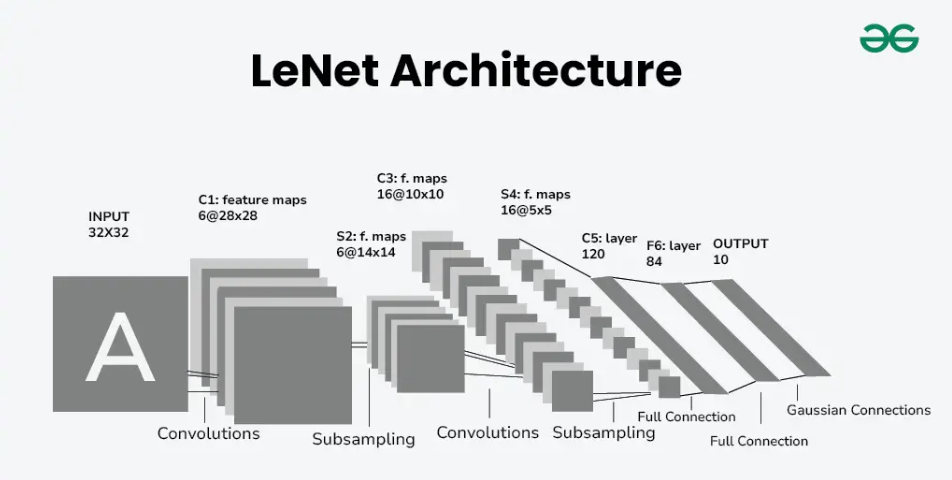
## ✅ Summary

LeNet-5:  
- **What**: CNN for image classification 🖼️  
- **Why**: Automatic feature learning 💡  
- **Where**: Handwriting recognition, banking, early computer vision 🌍  

In [10]:
! pip install torchsummary

In [11]:
import torch
from torchsummary import summary
import torch.nn as nn
import torch.nn.functional as F

class LeNet5(nn.Module):
    def __init__(self):
        # Call the parent class's init method
        super(LeNet5, self).__init__()
        
        # First Convolutional Layer
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1)
        
        # Max Pooling Layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1)
        self.fc1 = nn.Linear(in_features=16 * 5 * 5, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=84)
        
        # Output Layer
        self.fc3 = nn.Linear(in_features=84, out_features=10)

    def forward(self, x):
        # Pass the input through the first convolutional layer and activation function
        x = self.pool(F.relu(self.conv1(x)))
        
        # Pass the output of the first layer through 
        # the second convolutional layer and activation function
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        
        # Pass the output of the second fully connected layer through the output layer
        x = self.fc3(x)
        
        # Return the final output
        return x
    
lenet5 = LeNet5()
print(lenet5)

LeNet5(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


#  AlexNet Architecture 

AlexNet is a **deep convolutional neural network (CNN)** introduced by **Alex Krizhevsky et al. in 2012**.  
It won the ImageNet Large Scale Visual Recognition Challenge (ILSVRC) 2012 with remarkable accuracy, revolutionizing deep learning for computer vision.


## ❓ What is AlexNet?

- A CNN designed for **image classification** on large-scale datasets.  
- Inputs **224x224x3 RGB images**.  
- Extracts hierarchical features through **convolutions, pooling, and fully connected layers**.


## 🎯 Why AlexNet?

- Introduced **ReLU activation** for faster training.  
- Used **dropout** to reduce overfitting.  
- Demonstrated the effectiveness of **deep CNNs** on large-scale image recognition tasks.  

## 🌍 Where is AlexNet used?

- **Image Classification**: Recognizing objects in large datasets 🖼️  
- **Transfer Learning**: Pretrained AlexNet used for other vision tasks 🔄  
- **Feature Extraction**: For object detection, style transfer, and more 🎨  



## 🏗️ Layer-by-Layer Architecture

1. **Input Layer**  
   - Size: 224x224x3 (RGB image)  

2. **Conv1 – Convolutional Layer**  
   - Filters: 96, Kernel: 11x11, Stride: 4  
   - Activation: ReLU  
   - Output: 55x55x96  

3. **Max Pooling 1** 📉  
   - Kernel: 3x3, Stride: 2  
   - Reduces spatial size to 27x27x96  

4. **Conv2 – Convolutional Layer** 🌀  
   - Filters: 256, Kernel: 5x5, Padding: 2  
   - Activation: ReLU  
   - Output: 27x27x256  

5. **Max Pooling 2** 📉  
   - Kernel: 3x3, Stride: 2  
   - Output: 13x13x256  

6. **Conv3 – Convolutional Layer**   
   - Filters: 384, Kernel: 3x3, Padding: 1  
   - Activation: ReLU  
   - Output: 13x13x384  

7. **Conv4 – Convolutional Layer** 🌀  
   - Filters: 384, Kernel: 3x3, Padding: 1  
   - Activation: ReLU  
   - Output: 13x13x384  

8. **Conv5 – Convolutional Layer** 🌀  
   - Filters: 256, Kernel: 3x3, Padding: 1  
   - Activation: ReLU  
   - Output: 13x13x256  

9. **Max Pooling 3** 📉  
   - Kernel: 3x3, Stride: 2  
   - Output: 6x6x256  

10. **Flatten Layer** 🔄  
    - Converts 3D feature maps into 1D vector of size 6*6*256 = 9216  

11. **Fully Connected 1 (FC6)**   
    - Neurons: 4096  
    - Activation: ReLU  
    - Dropout: 0.5  

12. **Fully Connected 2 (FC7)**   
    - Neurons: 4096  
    - Activation: ReLU  
    - Dropout: 0.5  

13. **Output Layer (FC8)** 🏁  
    - Neurons: 1000 (for ImageNet classes)  
    - Activation: Softmax  


## 💡 Key Innovations

- **ReLU Activation**: Faster training than sigmoid/tanh  
- **Dropout Layers**: Prevents overfitting  
- **Data Augmentation**: Improves generalization  
- **GPU Training**: Enabled by splitting model across 2 GPUs

  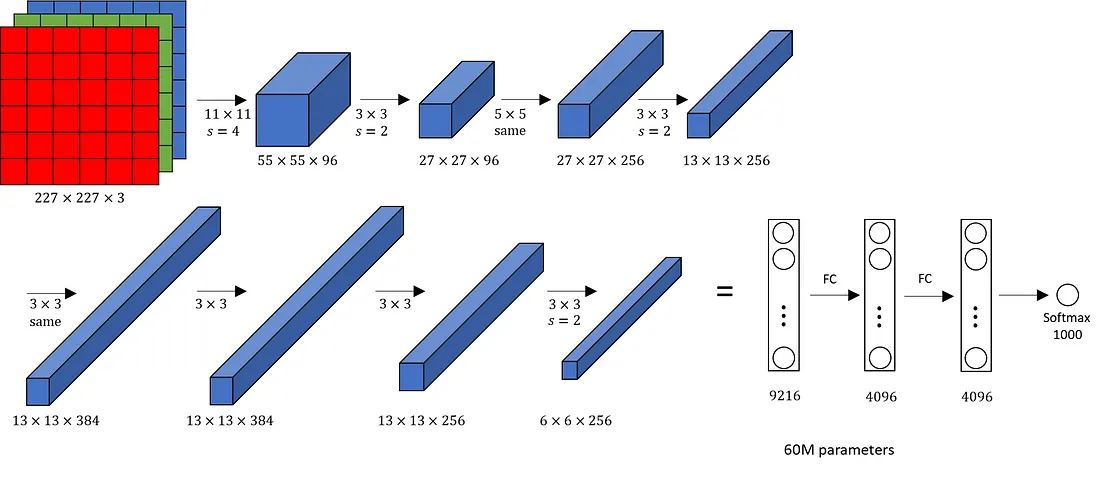

## ✅ Summary

AlexNet:  
- **What**: Deep CNN for large-scale image classification 🖼️  
- **Why**: ReLU, dropout, deep architecture for high accuracy 💡  
- **Where**: ImageNet, feature extraction, transfer learning 🌍  

In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class AlexNet(nn.Module):
    def __init__(self, num_classes=1000):
        super(AlexNet, self).__init__()
        # Convolutional Layers
        self.features = nn.Sequential(
            nn.Conv2d(3, 96, kernel_size=11, stride=4, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.LocalResponseNorm(size=5, alpha=0.0001, beta=0.75, k=2),

            nn.Conv2d(96, 256, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.LocalResponseNorm(size=5, alpha=0.0001, beta=0.75, k=2),

            nn.Conv2d(256, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),

            nn.Conv2d(384, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),

            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2)
        )

        # Fully Connected Layers
        self.classifier = nn.Sequential(
            nn.Dropout(p=0.5),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            
            nn.Dropout(p=0.5),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),

            nn.Linear(4096, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), 256 * 6 * 6)
        x = self.classifier(x)
        return x

# Example: Initialize the model
model = AlexNet(num_classes=1000)
print(model)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 96, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): LocalResponseNorm(5, alpha=0.0001, beta=0.75, k=2)
    (4): Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): LocalResponseNorm(5, alpha=0.0001, beta=0.75, k=2)
    (8): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=F

#  VGG-Net Architecture Overview

VGG-Net, introduced by the Visual Geometry Group (VGG) at the University of Oxford, is a deep convolutional neural network (CNN) known for its simplicity and effectiveness in image classification tasks. The architecture is characterized by its use of small 3x3 convolution filters stacked in multiple layers, creating a deep and uniform structure.


## ❓ What is VGG-Net?

- A deep CNN designed for image classification tasks.
- VGG-16 and VGG-19 are the most notable models, with 16 and 19 weight layers, respectively.
- Utilizes small 3x3 convolution filters with a stride of 1 and padding of 1 to preserve spatial resolution.
- Employs ReLU activation functions after each convolutional layer.
- Incorporates max pooling with a 2x2 filter and stride of 2 to reduce spatial dimensions.
- Concludes with three fully connected layers for classification.


## 🎯 Why VGG-Net?

- Demonstrated that increasing the depth of CNNs can significantly enhance model performance.
- Achieved state-of-the-art performance on the ImageNet dataset.
- Its simplicity and uniform architecture make it easy to understand and implement.


## 🌍 Where is VGG-Net used?

- **Image Classification**: Recognizing objects in images.
- **Feature Extraction**: Using pre-trained VGG models to extract features for other tasks.
- **Transfer Learning**: Fine-tuning pre-trained VGG models for specific tasks.


##  VGG-19 Layer-by-Layer Architecture

The VGG-19 model consists of five blocks of convolutional layers, followed by three fully connected layers. Here's a detailed breakdown:

### Block 1

- Conv1_1: 64 filters, 3x3 kernel, ReLU activation
- Conv1_2: 64 filters, 3x3 kernel, ReLU activation
- Max Pooling: 2x2 filter, stride 2

### Block 2

- Conv2_1: 128 filters, 3x3 kernel, ReLU activation
- Conv2_2: 128 filters, 3x3 kernel, ReLU activation
- Max Pooling: 2x2 filter, stride 2

### Block 3

- Conv3_1: 256 filters, 3x3 kernel, ReLU activation
- Conv3_2: 256 filters, 3x3 kernel, ReLU activation
- Conv3_3: 256 filters, 3x3 kernel, ReLU activation
- Conv3_4: 256 filters, 3x3 kernel, ReLU activation
- Max Pooling: 2x2 filter, stride 2

### Block 4

- Conv4_1: 512 filters, 3x3 kernel, ReLU activation
- Conv4_2: 512 filters, 3x3 kernel, ReLU activation
- Conv4_3: 512 filters, 3x3 kernel, ReLU activation
- Conv4_4: 512 filters, 3x3 kernel, ReLU activation
- Max Pooling: 2x2 filter, stride 2

### Block 5

- Conv5_1: 512 filters, 3x3 kernel, ReLU activation
- Conv5_2: 512 filters, 3x3 kernel, ReLU activation
- Conv5_3: 512 filters, 3x3 kernel, ReLU activation
- Conv5_4: 512 filters, 3x3 kernel, ReLU activation
- Max Pooling: 2x2 filter, stride 2

### Fully Connected Layers

- FC1: 4096 neurons, ReLU activation
- FC2: 4096 neurons, ReLU activation
- FC3: 1000 neurons, softmax activation (for 1000-class classification)



## 💡 Key Innovations

- **Uniform Architecture**: Consistent use of 3x3 convolution filters and 2x2 max pooling layers.
- **Depth**: Increased depth allows the network to learn more complex features.
- **ReLU Activation**: Introduced non-linearity, enabling the network to learn more complex patterns.

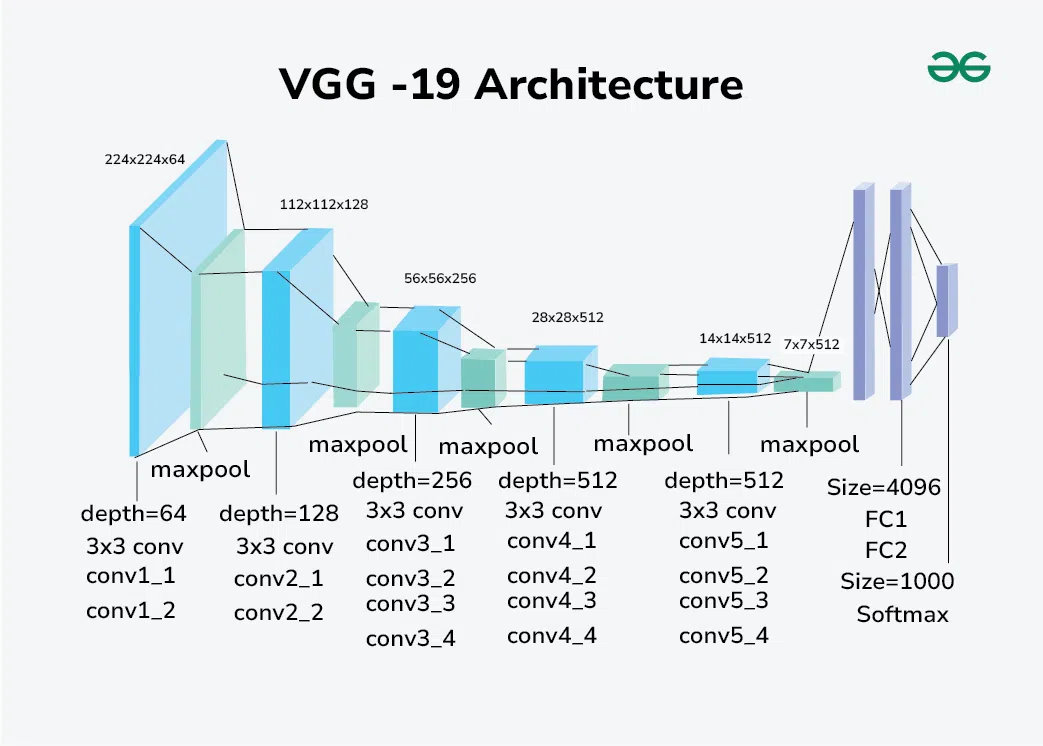
## ✅ Summary

VGG-Net:

- **What**: Deep CNN for image classification
- **Why**: Demonstrated the effectiveness of deep architectures with small convolution filters
- **Where**: Image classification, feature extraction, transfer learning


In [31]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class VGGNet(nn.Module):
    def __init__(self, num_classes=10):
        super(VGGNet, self).__init__()
        
        # Convolutional layers (VGG-style blocks)
        self.conv_block1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),  
            nn.ReLU(inplace=True),
            nn.Conv2d(32, 32, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)       
        )
        
        self.conv_block2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, padding=1), 
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)     
        )
        
        # Fully connected layers
        self.fc_layers = nn.Sequential(
            nn.Linear(64*7*7, 256),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.conv_block1(x)
        x = self.conv_block2(x)
        x = x.view(x.size(0), -1)  # Flatten
        x = self.fc_layers(x)
        return x

# Test model summary
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = VGGNet().to(device)

# Print model summary (requires torchsummary)
from torchsummary import summary
summary(model, input_size=(1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             320
              ReLU-2           [-1, 32, 28, 28]               0
            Conv2d-3           [-1, 32, 28, 28]           9,248
              ReLU-4           [-1, 32, 28, 28]               0
         MaxPool2d-5           [-1, 32, 14, 14]               0
            Conv2d-6           [-1, 64, 14, 14]          18,496
              ReLU-7           [-1, 64, 14, 14]               0
            Conv2d-8           [-1, 64, 14, 14]          36,928
              ReLU-9           [-1, 64, 14, 14]               0
        MaxPool2d-10             [-1, 64, 7, 7]               0
           Linear-11                  [-1, 256]         803,072
             ReLU-12                  [-1, 256]               0
          Dropout-13                  [-1, 256]               0
           Linear-14                   

# 🕸️ GoogLeNet (Inception V1) Architecture Overview

GoogLeNet (also known as Inception V1) is a deep Convolutional Neural Network designed for image classification. It introduces the **Inception module**, along with other architectural innovations, balancing depth and computational efficiency.


## ❓ What is GoogLeNet?

- A CNN architecture aiming for high accuracy *and* computational efficiency. 
- Uses Inception modules — parallel convolution paths of different kernel sizes plus pooling, then concatenated. 
- Introduces techniques like **1×1 convolutions**, **global average pooling**, and **auxiliary classifiers**. 


## 🎯 Why GoogLeNet?

- To capture features at multiple scales (small & large) via parallel paths.
- To reduce parameters & computation using 1×1 convolutions for dimensionality reduction. 
- To avoid overfitting and vanishing gradients using techniques like auxiliary.
- To replace heavy fully connected layers with global average pooling, reducing parameter


## 🌍 Where / When is GoogLeNet Used?

- Large-scale image classification tasks, especially where computational resources are a concern. 
- Winner of ILSVRC (ImageNet Large Scale Visual Recognition Challenge) 2014 in classification and detection. 
- Good for feature extraction in transfer learning, when one wants deep representational power without massively heavy models. (Implied by architecture’s design.) 



## 🏗️ Key Architectural Components

1. **1×1 Convolutions**  
   - Used for *dimensionality reduction*.
   - Example: Reducing computational cost dramatically in layers. 

2. **Global Average Pooling**  
   - Replaces fully-connected layers at the end.  
   - Converts each feature map (e.g. 7×7) into a single value. 
   - Reduces overfitting; no extra trainable parameters. {index=15}

3. **Inception Module**  
   - Parallel branches: 1×1, 3×3, 5×5 convs + 3×3 max pooling. 
   - Their outputs concatenated depth-wise. 
   - Helps the network see features at multiple scales without blowing up computation. 

4. **Auxiliary Classifiers**  
   - Intermediate branches added during training. 
   - Each contains: average pooling (5×5, stride 3), 1×1 conv (ReLU), a fully connected layer (1024 units), dropout (0.7), then softmax classifier.
   - They help with vanishing gradients and act like regularizers. 



## 🧱 GoogLeNet (Inception V1) Layer-by-Layer Summary

- Depth: ~22 layers (excluding pooling). 
- **Input Layer**: 224×224 RGB image.  
- **Initial Layers**: Some conv + max-pooling, Local Response Normalization (LRN) to downsample & extract low-level features. 
- **Inception Modules**: multiple stacked, e.g., at positions like Inception(4a), Inception(4d), etc. 
- **Auxiliary classifiers** connected to outputs of certain Inception modules (for example after Inception(4a) and Inception(4d)).   
- **Final Layers**: Global average pooling (7×7 → 1×1), followed by a final fully connected + softmax for classification. 


## 📊 Performance & Results

- **Winner** of the ILSVRC 2014 for both classification & detection tasks. 
- Achieved **top-5 error rate ≈ 6.67%** on classification. {index=29}  
- Using an ensemble of six GoogLeNet models, it had a detection mAP (mean Average Precision) of ~43.9%. 


## ✅ Summary

GoogLeNet (Inception V1):  
- **What**: Deep CNN with parallel multi-scale feature extraction + efficient design.  
- **Why**: To capture diverse features, reduce parameter count, avoid overfitting and computational bottlenecks.  
- **Where**: Large-scale image recognition, when balancing accuracy & computational cost. 

    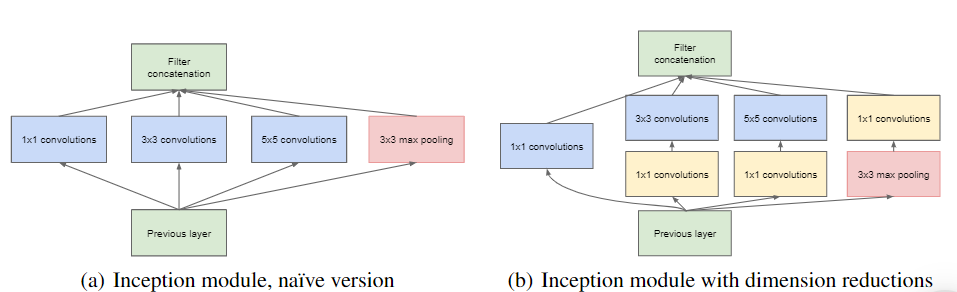

In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Inception Module
class InceptionModule(nn.Module):
    def __init__(self, in_channels, out1x1, out3x3, out5x5, out_pool):
        super(InceptionModule, self).__init__()
        
        # 1x1 conv branch
        self.branch1 = nn.Conv2d(in_channels, out1x1, kernel_size=1)
        
        # 1x1 conv -> 3x3 conv branch
        self.branch2 = nn.Sequential(
            nn.Conv2d(in_channels, out3x3, kernel_size=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(out3x3, out3x3, kernel_size=3, padding=1)
        )
        
        # 1x1 conv -> 5x5 conv branch
        self.branch3 = nn.Sequential(
            nn.Conv2d(in_channels, out5x5, kernel_size=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(out5x5, out5x5, kernel_size=5, padding=2)
        )
        
        # 3x3 max pooling -> 1x1 conv branch
        self.branch4 = nn.Sequential(
            nn.MaxPool2d(kernel_size=3, stride=1, padding=1),
            nn.Conv2d(in_channels, out_pool, kernel_size=1)
        )
        
    def forward(self, x):
        branch1 = F.relu(self.branch1(x))
        branch2 = F.relu(self.branch2(x))
        branch3 = F.relu(self.branch3(x))
        branch4 = F.relu(self.branch4(x))
        # Concatenate along channel dimension
        outputs = torch.cat([branch1, branch2, branch3, branch4], 1)
        return outputs

# GoogLeNet / Inception-like CNN
class GoogLeNetMini(nn.Module):
    def __init__(self, num_classes=10):
        super(GoogLeNetMini, self).__init__()
        # Initial convolution + pooling
        self.pre_layers = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(3, stride=2, padding=1)
        )
        
        # Inception modules
        self.inception3a = InceptionModule(64, 32, 32, 32, 32)
        self.inception3b = InceptionModule(128, 64, 64, 64, 64)
        self.maxpool = nn.MaxPool2d(3, stride=2, padding=1)
        
        # Fully connected layers
        self.avgpool = nn.AdaptiveAvgPool2d((1,1))
        self.fc = nn.Linear(256, num_classes)
        
    def forward(self, x):
        x = self.pre_layers(x)
        x = self.inception3a(x)
        x = self.inception3b(x)
        x = self.maxpool(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x


# Test the model summary
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = GoogLeNetMini().to(device)

from torchsummary import summary
summary(model, input_size=(1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 14, 14]           3,200
              ReLU-2           [-1, 64, 14, 14]               0
         MaxPool2d-3             [-1, 64, 7, 7]               0
            Conv2d-4             [-1, 32, 7, 7]           2,080
            Conv2d-5             [-1, 32, 7, 7]           2,080
              ReLU-6             [-1, 32, 7, 7]               0
            Conv2d-7             [-1, 32, 7, 7]           9,248
            Conv2d-8             [-1, 32, 7, 7]           2,080
              ReLU-9             [-1, 32, 7, 7]               0
           Conv2d-10             [-1, 32, 7, 7]          25,632
        MaxPool2d-11             [-1, 64, 7, 7]               0
           Conv2d-12             [-1, 32, 7, 7]           2,080
  InceptionModule-13            [-1, 128, 7, 7]               0
           Conv2d-14             [-1, 6

# 🔁 Residual Networks (ResNet) 

ResNet (Residual Networks) is a deep convolutional neural network architecture introduced to help train much deeper networks by using *skip connections* (also known as residual or identity connections).


## ❓ What is ResNet?

- A neural network architecture that learns **residual functions** instead of trying to learn a direct mapping.  
- The fundamental building block is a **residual block**:  
- ResNet models are very deep (e.g. ResNet-152 has 152 layers) but manage complexity and training stability through the residual learning paradigm.


## 🎯 Why was ResNet introduced?

- To address the **degradation problem**: as networks get deeper, accuracy (on training as well as validation) sometimes *gets worse*, not better.  
- To solve or reduce **vanishing gradient** issues that make training deep networks difficult. Skip connections provide direct paths for gradients to backpropagate.  
- Helps ease optimization, improve convergence, and allow designing deeper networks with better performance.


## 🌍 Where / When is ResNet used?

- Image classification tasks, especially on very large datasets (e.g. ImageNet).  
- Object detection, localization, and any computer vision tasks that benefit from deep feature hierarchies.  
- Transfer learning: pretrained ResNet models are widely used as feature extractors or backbones.  


## 🏗️ Architecture / How it works

- **Residual Block Structure**:  
  1. A convolutional layer (e.g. 3×3), followed by batch normalization, then a ReLU activation.  
  2. Another convolution + batch norm.  
  3. Then *adding* x (input) to the output of the second convolution (skip/identity connection). After that, apply ReLU.  

- **Skip (Identity) Connection**: Connects input x directly to a later layer’s output so that layers can learn residuals. Useful when input and output dimensions match. If they don’t match, a 1×1 convolution on the skip path is used to match dimensions.  

- **Variants & Depths**:  
  - ResNet-18, ResNet-34 use “basic” blocks (two 3×3 convs per block).  
  - Deeper versions like ResNet-50, ResNet-101, ResNet-152 use *bottleneck blocks*: 1×1 conv to reduce dimension → 3×3 conv → 1×1 conv to restore dimensions.  

- **Performance metrics**:  
  - On ImageNet, ResNet achieved very low error rates (e.g. ~3.57% top-5 error) when compared to older architectures.  


## 💡 Key Innovations / Advantages

- Enables training of **very deep networks** while avoiding degradation.  
- Skip connections give gradient paths that help earlier layers learn better.  
- Using identity mapping plus possibly dimension matching (via 1×1 conv) keeps the architecture efficient.  
- Bottleneck blocks for deeper networks reduce computational cost while preserving representational power.  


## ⚠️ Limitations / Considerations

- Even with skip connections, very deep networks require careful design (e.g. how to downsample, how to match dimensions).  
- More layers = more compute, memory. There are trade-offs between depth and efficiency.  


## ✅ Summary

ResNet (Residual Networks):

- **What**: Deep CNN architecture with skip / residual connections.  
- **Why**: To fix degradation & vanishing gradient problems; to allow deeper, more accurate networks.  
- **How**: Residual blocks where output = input + F(input), bottleneck or basic blocks, matching dimensions when needed.  
- **Where**: Image classification, object detection, transfer learning, etc.  

In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class BasicBlock(nn.Module):
    expansion = 1   # no channel expansion in BasicBlock

    def __init__(self, in_channels, out_channels, stride=1, downsample=None):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, 
                               stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3,
                               stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.downsample = downsample

    def forward(self, x):
        identity = x
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))

        if self.downsample is not None:
            identity = self.downsample(x)

        out += identity
        return F.relu(out)


class BottleneckBlock(nn.Module):
    expansion = 4   # bottleneck expands channels 4x

    def __init__(self, in_channels, out_channels, stride=1, downsample=None):
        super(BottleneckBlock, self).__init__()
        # 1x1 Conv (reduce dimensions)
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        # 3x3 Conv
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, 
                               stride=stride, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        # 1x1 Conv (restore dimensions)
        self.conv3 = nn.Conv2d(out_channels, out_channels * self.expansion, 
                               kernel_size=1, bias=False)
        self.bn3 = nn.BatchNorm2d(out_channels * self.expansion)
        self.downsample = downsample

    def forward(self, x):
        identity = x
        out = F.relu(self.bn1(self.conv1(x)))
        out = F.relu(self.bn2(self.conv2(out)))
        out = self.bn3(self.conv3(out))

        if self.downsample is not None:
            identity = self.downsample(x)

        out += identity
        return F.relu(out)


class ResNet(nn.Module):
    def __init__(self, block, layers, num_classes=1000):
        super(ResNet, self).__init__()
        self.in_channels = 64

        # Initial Conv + BN + ReLU + MaxPool
        self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)

        # Residual layers
        self.layer1 = self._make_layer(block, 64, layers[0])
        self.layer2 = self._make_layer(block, 128, layers[1], stride=2)
        self.layer3 = self._make_layer(block, 256, layers[2], stride=2)
        self.layer4 = self._make_layer(block, 512, layers[3], stride=2)

        # Global Average Pooling + Fully Connected Layer
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512 * block.expansion, num_classes)

    def _make_layer(self, block, out_channels, blocks, stride=1):
        downsample = None
        if stride != 1 or self.in_channels != out_channels * block.expansion:
            downsample = nn.Sequential(
                nn.Conv2d(self.in_channels, out_channels * block.expansion,
                          kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels * block.expansion),
            )

        layers = []
        layers.append(block(self.in_channels, out_channels, stride, downsample))
        self.in_channels = out_channels * block.expansion
        for _ in range(1, blocks):
            layers.append(block(self.in_channels, out_channels))

        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.relu(self.bn1(self.conv1(x)))
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)

        return x

def ResNet18(num_classes=1000):
    return ResNet(BasicBlock, [2, 2, 2, 2], num_classes)

def ResNet34(num_classes=1000):
    return ResNet(BasicBlock, [3, 4, 6, 3], num_classes)

def ResNet50(num_classes=1000):
    return ResNet(BottleneckBlock, [3, 4, 6, 3], num_classes)

def ResNet101(num_classes=1000):
    return ResNet(BottleneckBlock, [3, 4, 23, 3], num_classes)

def ResNet152(num_classes=1000):
    return ResNet(BottleneckBlock, [3, 8, 36, 3], num_classes)


if __name__ == "__main__":
    model = ResNet18(num_classes=10)  
    x = torch.randn(1, 3, 224, 224)
    y = model(x)
    print("Output shape:", y.shape)   

Output shape: torch.Size([1, 10])


# 🌐 DenseNet Explained

DenseNet (Dense Convolutional Network) is a CNN architecture introduced in 2017 by Gao Huang, Zhuang Liu, Laurens van der Maaten, and Kilian Q. Weinberger. It improves information flow and gradient propagation by introducing dense connectivity among layers.


## ❓ What is DenseNet?

- In DenseNet, **every layer is directly connected to every other layer** in a feed-forward fashion.  
- Each layer receives **feature maps from all preceding layers** and passes its own feature maps to all subsequent layers.  
- This dense connectivity pattern helps address problems like vanishing gradients, feature reuse, and parameter efficiency.


## 🔑 Key Characteristics

1. **Alleviated Vanishing Gradient**  
   Gradients flow more directly from the loss to earlier layers due to many short paths. 
2. **Improved Feature Propagation**  
   Since each layer has access to preceding feature maps, the network propagates features (and gradients) more effectively. 
3. **Feature Reuse**  
   Layers reuse features from earlier layers, which reduces redundancy. 
4. **Reduced Parameters**  
   Despite the many connections, because of feature reuse and usage of bottleneck / transition layers, DenseNet uses fewer parameters than many traditional deep CNNs. 


## 🏗️ How DenseNet is Structured

DenseNet consists of several components:

- **Dense Block**  
  A block in which all layers are connected to all others. Within the block:

  - Convolutions are ReLU-activated + Batch Normalization.  
  - Convolutions inside a dense block all have stride 1 (so feature map width & height remain constant). 

- **Transition Layer**  
  Placed between dense blocks to reduce spatial dimensions & number of channels. Usually made of:

  - Batch Normalization  
  - 1×1 Convolution  
  - 2×2 Average Pooling 

- **Growth Rate (k)**  
  Defines how many new feature maps each layer adds. If growth rate = k, each layer adds k feature-maps. 

- **DenseNet Variants**  
  Different DenseNets are characterized by different numbers of dense blocks, layers per block, growth rates, etc. An example is DenseNet-121.


## ⚖️ Advantages & Limitations

**Advantages:**

- Better gradient flow → easier training of deeper networks.  
- More efficient in terms of parameters (because of reuse).   
- Strong performance on image classification, detection, segmentation tasks.
  
**Limitations:**
- Memory usage can be higher due to concatenation of many feature maps.  
- Some computational cost overhead because each layer needs to access all previous outputs. 


## 🔍 Applications

- Image classification  
- Object detection  
- Medical imaging  
- Other vision tasks where strong feature reuse and deep architectures are beneficial :contentReference[oaicite:14]{index=14}

    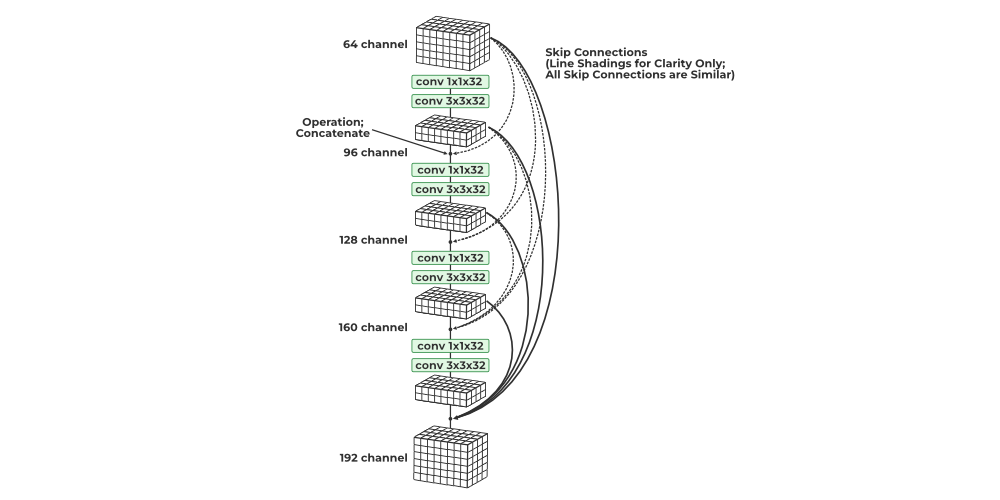
  
## 🔹 Summary 🏆

- Classic CNNs introduced **core concepts**: convolution, pooling, depth, and skip connections.  
- Each architecture addressed specific **challenges in deep learning**, such as overfitting, vanishing gradients, and computational efficiency.  
- Understanding these models helps in designing **modern CNNs** and **state-of-the-art architectures** like EfficientNet, MobileNet, and Transformer-based vision models.  

In [16]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class DenseLayer(nn.Module):
    def __init__(self, in_channels, growth_rate):
        super().__init__()
        self.bn1 = nn.BatchNorm2d(in_channels)
        self.relu = nn.ReLU(inplace=True)
        # Bottleneck 1x1 conv
        self.conv1 = nn.Conv2d(in_channels, 4 * growth_rate, kernel_size=1, stride=1, bias=False)
        self.bn2 = nn.BatchNorm2d(4 * growth_rate)
        self.conv2 = nn.Conv2d(4 * growth_rate, growth_rate, kernel_size=3, stride=1, padding=1, bias=False)

    def forward(self, x):
        out = self.conv1(self.relu(self.bn1(x)))
        out = self.conv2(self.relu(self.bn2(out)))
        # Concatenate input and output (dense connectivity)
        return torch.cat([x, out], dim=1)


class TransitionLayer(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.bn = nn.BatchNorm2d(in_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=1, bias=False)
        self.avg_pool = nn.AvgPool2d(kernel_size=2, stride=2)

    def forward(self, x):
        out = self.conv(self.relu(self.bn(x)))
        out = self.avg_pool(out)
        return out


class DenseNet121(nn.Module):
    def __init__(self, growth_rate=32, block_layers=(6, 12, 24, 16), num_classes=1000):
        super().__init__()
        # Initial convolution + pooling
        self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)

        self.features = nn.Sequential()
        num_channels = 64

        # Build dense blocks and transition layers
        for i, num_layers in enumerate(block_layers):
            # Dense Block
            block = nn.Sequential()
            for j in range(num_layers):
                layer = DenseLayer(num_channels, growth_rate)
                block.add_module(f"denseblock_{i+1}_layer_{j+1}", layer)
                num_channels += growth_rate
            self.features.add_module(f"denseblock_{i+1}", block)

            # Transition layer (except after last block)
            if i != len(block_layers) - 1:
                out_channels = num_channels // 2
                trans = TransitionLayer(num_channels, out_channels)
                self.features.add_module(f"transition_{i+1}", trans)
                num_channels = out_channels

        # Final batch norm
        self.bn_final = nn.BatchNorm2d(num_channels)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(num_channels, num_classes)

    def forward(self, x):
        out = self.relu(self.bn1(self.conv1(x)))
        out = self.maxpool(out)
        out = self.features(out)
        out = self.relu(self.bn_final(out))
        out = self.avgpool(out)
        out = torch.flatten(out, 1)
        return self.fc(out)


#  Example usage
if __name__ == "__main__":
    model = DenseNet121(num_classes=1000)
    x = torch.randn(1, 3, 224, 224)  # sample input image
    y = model(x)
    print("Output shape:", y.shape)  # should be [1, 1000]

Output shape: torch.Size([1, 1000])
